In [1]:
import ensemble
import importlib
importlib.reload(ensemble)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]


from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.datasets import make_regression

# Repeating the results

In [2]:
num_experiments = 100
hist_params = {'bins':25,'grid':False,'sharey':True,'sharex':False}#,'ylim':(0,30)}#,'sharex':True}#,'ylabelsize':1}


# Linear Case

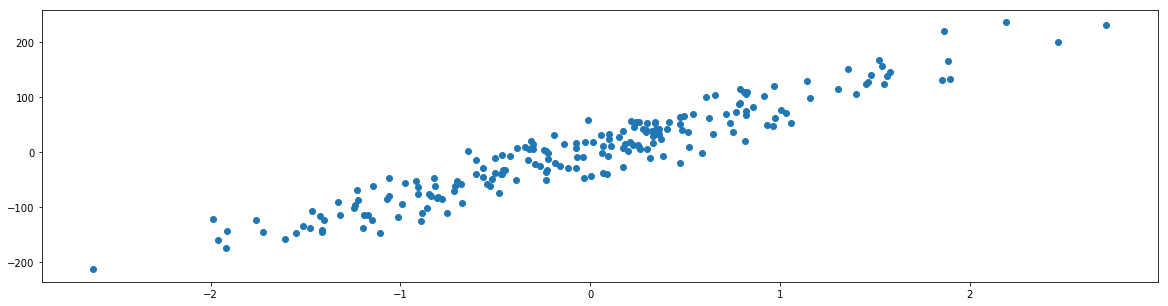

In [3]:
X, y = make_regression(n_samples=200, n_features=1, noise=25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.scatter(X,y)

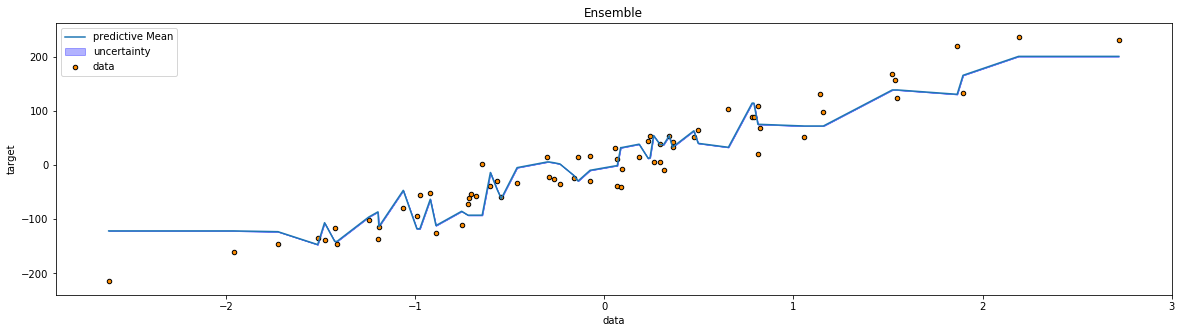

In [4]:
treeEnsemble = ensemble.RegressionEnsemble(100,DecisionTreeRegressor)
treeEnsemble.fit(X_train,y_train)
y_hat,std  = treeEnsemble.predict(X_test,std=True)
treeEnsemble.mutli_dimenstional_scatterplot(X_test,y_test,figsize=(20,5))

In [5]:
results_list = []

for i in range(num_experiments):
    treeEnsemble = ensemble.RegressionEnsemble(10,DecisionTreeRegressor,seed = i+42)
    treeEnsemble.fit(X_train,y_train)
    results = treeEnsemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_tree_results = pd.DataFrame.from_records(results_list)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11788e7f0>,
      dtype=object)

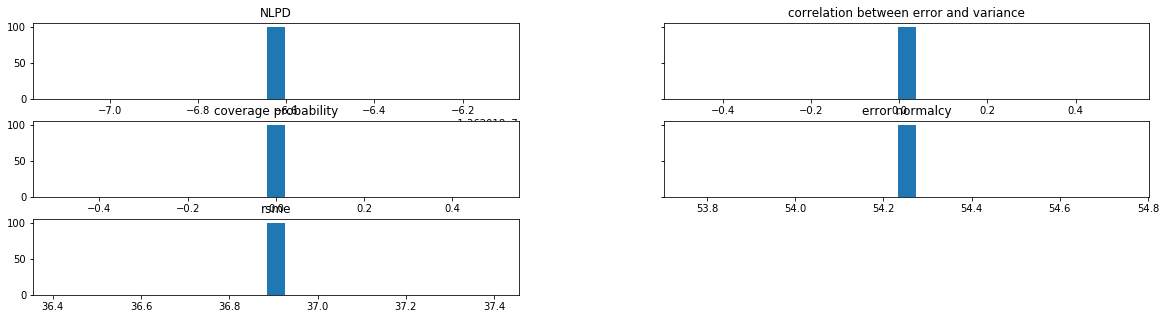

In [6]:
df_tree_results.hist(**hist_params)

In [7]:
df_tree_results.describe()

,NLPD,correlation between error and variance,coverage probability,error normalcy,rsme
count,1.000000e+02,1.000000e+02,100.0,100.000000,1.000000e+02
mean,-1.362019e+07,1.696095e-02,0.0,54.252786,3.690554e+01
std,1.872029e-09,6.973851e-18,0.0,0.000000,1.428245e-14
min,-1.362019e+07,1.696095e-02,0.0,54.252786,3.690554e+01
25%,-1.362019e+07,1.696095e-02,0.0,54.252786,3.690554e+01
50%,-1.362019e+07,1.696095e-02,0.0,54.252786,3.690554e+01
75%,-1.362019e+07,1.696095e-02,0.0,54.252786,3.690554e+01
max,-1.362019e+07,1.696095e-02,0.0,54.252786,3.690554e+01


## Mixed Ensemble

In [8]:
results_list = []

for i in range(num_experiments):
    mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            #LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=1000),
                                                           SVR()])
    mixed_ensemble.fit(X_train,y_train)
    results = mixed_ensemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_mixed_results = pd.DataFrame.from_records(results_list)

/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117b3f128>,
      dtype=object)

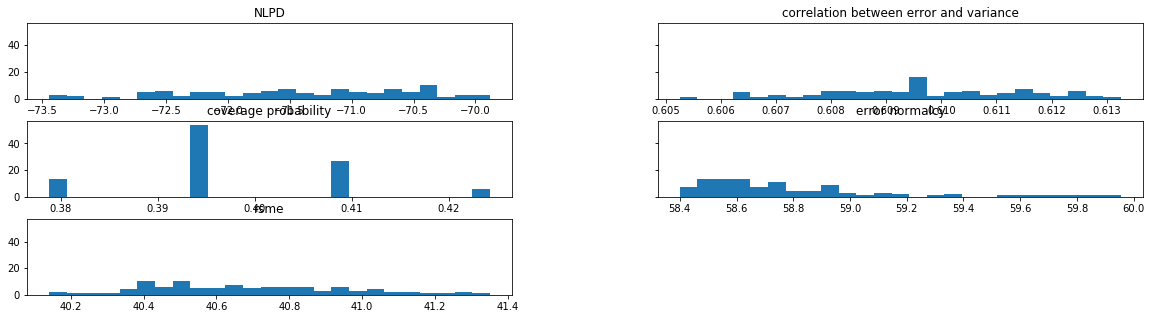

In [9]:
df_mixed_results.hist(**hist_params)

In [27]:
df_mixed_results.describe()

,NLPD,correlation between error and variance,coverage probability,error normalcy,rsme
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-7.068126,0.541144,0.733473,128.049224,6.908558
std,0.916002,0.129716,0.107274,51.604235,1.798337
min,-9.525061,0.296097,0.562874,27.881204,4.634876
25%,-7.614542,0.452528,0.640719,78.478480,5.470397
50%,-6.982235,0.540648,0.706587,151.571689,6.106853
75%,-6.339315,0.592833,0.845808,169.515401,8.342051
max,-5.448687,0.854098,0.928144,203.187741,10.872409


# Boston

In [10]:
boston = load_boston()
y = boston.target
X = boston.data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#hist_params= {}#{'bins':25}

## Simple trees

In [11]:
results_list = []

for i in range(num_experiments):
    treeEnsemble = ensemble.RegressionEnsemble(10,DecisionTreeRegressor,seed = i+42)
    treeEnsemble.fit(X_train,y_train)
    results = treeEnsemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_tree_results = pd.DataFrame.from_records(results_list)

In [12]:
df_tree_results.head()

,NLPD,correlation between error and variance,coverage probability,error normalcy,rsme
0,-67682.481712,-0.029019,0.131737,244.215024,4.262507
1,-67682.773442,-0.025103,0.131737,244.309858,4.271404
2,-67682.060879,-0.016150,0.137725,243.869152,4.291311
3,-66061.443691,-0.015190,0.125749,245.059659,4.279215
4,-62534.069135,-0.017129,0.137725,245.650775,4.274653


In [13]:
df_tree_results.describe()

,NLPD,correlation between error and variance,coverage probability,error normalcy,rsme
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-64443.305128,-0.005667,0.123114,244.176372,4.301257
std,4137.934082,0.012656,0.010046,1.929781,0.028315
min,-80563.106080,-0.035454,0.095808,239.790989,4.241548
25%,-67451.574247,-0.015513,0.118263,242.759050,4.279030
50%,-63504.946744,-0.003440,0.125749,244.502570,4.297514
75%,-60282.600727,0.004464,0.131737,245.373501,4.325266
max,-59746.238343,0.022294,0.143713,248.064378,4.364695


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118b9fb38>,
      dtype=object)

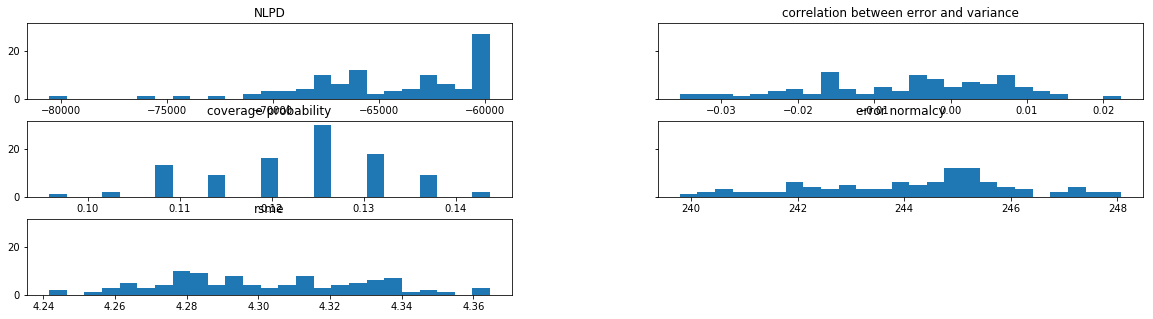

In [14]:
df_tree_results.hist(**hist_params)

## mixed Ensembles

In [15]:
results_list = []

for i in range(num_experiments):
    mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            #LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=1000),
                                                           SVR()])
    mixed_ensemble.fit(X_train,y_train)
    results = mixed_ensemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_mixed_results = pd.DataFrame.from_records(results_list)

In [16]:
df_mixed_results.head()

,NLPD,correlation between error and variance,coverage probability,error normalcy,rsme
0,-6.053470,0.561669,0.628743,173.275852,4.634876
1,-7.077117,0.743070,0.874251,75.488957,8.468133
2,-7.116731,0.484605,0.886228,30.391204,8.425825
3,-6.863031,0.308543,0.862275,34.039621,7.671869
4,-6.855518,0.353605,0.670659,167.505848,5.632193


In [17]:
df_mixed_results.describe()

,NLPD,correlation between error and variance,coverage probability,error normalcy,rsme
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-7.068126,0.541144,0.733473,128.049224,6.908558
std,0.916002,0.129716,0.107274,51.604235,1.798337
min,-9.525061,0.296097,0.562874,27.881204,4.634876
25%,-7.614542,0.452528,0.640719,78.478480,5.470397
50%,-6.982235,0.540648,0.706587,151.571689,6.106853
75%,-6.339315,0.592833,0.845808,169.515401,8.342051
max,-5.448687,0.854098,0.928144,203.187741,10.872409


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11906fe10>,
      dtype=object)

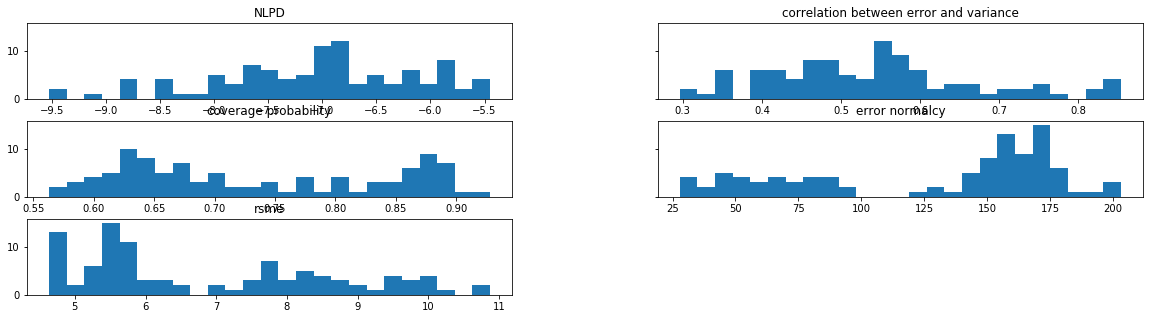

In [18]:
df_mixed_results.hist(**hist_params)

## Bootstrap

In [19]:
results_list = []

for i in range(num_experiments):
    bootstrap_ensemble = ensemble.BootstrapEnsemble()

    bootstrap_ensemble.fit(X_train,y_train)
    results = bootstrap_ensemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_bootstrap_results = pd.DataFrame.from_records(results_list)

In [20]:
df_bootstrap_results.head()

,NLPD,correlation between error and variance,coverage probability,error normalcy,rsme
0,-4.030944,0.368845,0.682635,315.750737,3.742564
1,-4.133924,0.419887,0.688623,312.893281,3.800230
2,-4.167113,0.410736,0.712575,312.077487,3.803897
3,-3.963536,0.403079,0.712575,308.732375,3.695548
4,-3.979431,0.405917,0.694611,309.330209,3.774543


In [21]:
df_bootstrap_results.describe()

,NLPD,correlation between error and variance,coverage probability,error normalcy,rsme
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-4.047035,0.387648,0.695329,315.359195,3.740369
std,0.104845,0.019089,0.018299,3.759014,0.041889
min,-4.310799,0.312438,0.646707,306.831545,3.643756
25%,-4.118861,0.376287,0.682635,313.325801,3.711881
50%,-4.038451,0.387965,0.694611,315.625874,3.735906
75%,-3.973209,0.401023,0.706587,317.756020,3.774946
max,-3.824039,0.427347,0.730539,324.794537,3.846729


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119508860>,
      dtype=object)

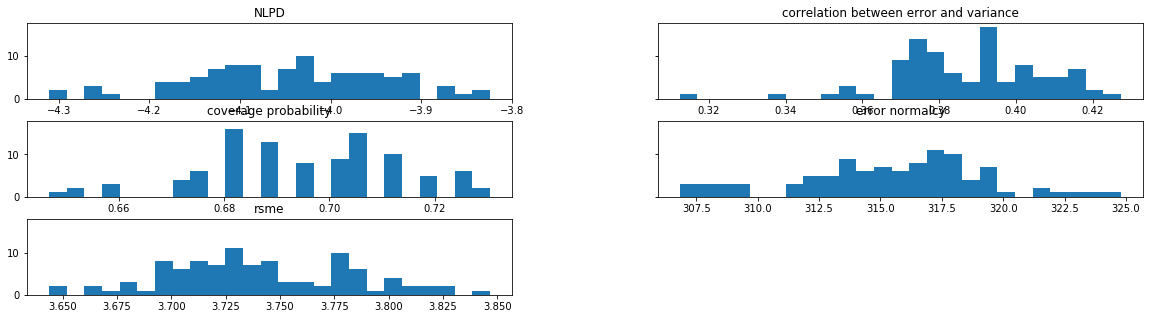

In [22]:
df_bootstrap_results.hist(**hist_params)

## Different Data Shuffling

In [23]:
results_list = []

for i in range(num_experiments):
    shuffle_ensemble = ensemble.ShuffleEnsemble()
    shuffle_ensemble.fit(X_train,y_train)
    results = shuffle_ensemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_shuffle_results = pd.DataFrame.from_records(results_list)

In [24]:
df_shuffle_results.head()

,NLPD,correlation between error and variance,coverage probability,error normalcy,rsme
0,-65001.105490,-0.046050,0.137725,243.083540,4.311315
1,-64771.019037,-0.047499,0.167665,245.532901,4.267719
2,-60722.974112,-0.034986,0.143713,244.943610,4.300239
3,-63633.938861,-0.023659,0.143713,243.985029,4.314122
4,-69712.522269,-0.061695,0.143713,245.394260,4.270347


In [25]:
df_shuffle_results.describe()

,NLPD,correlation between error and variance,coverage probability,error normalcy,rsme
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-64254.612632,-0.042105,0.150719,245.140412,4.280293
std,4257.635790,0.011858,0.012568,1.907938,0.031449
min,-76629.739905,-0.071114,0.113772,239.579045,4.205381
25%,-67639.883522,-0.049783,0.143713,244.067529,4.256638
50%,-63070.748910,-0.043575,0.149701,245.031088,4.276581
75%,-60752.790334,-0.033418,0.161677,246.417325,4.299916
max,-59663.671779,-0.017164,0.185629,250.039416,4.366337


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119b450f0>,
      dtype=object)

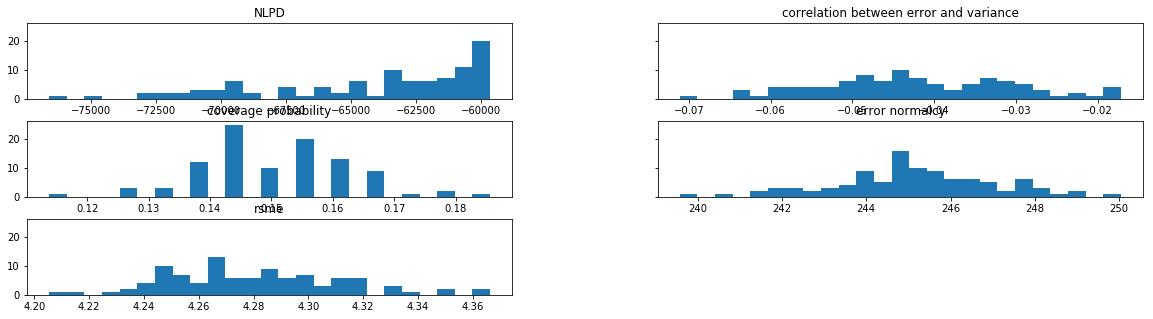

In [26]:
df_shuffle_results.hist(**hist_params)